# Berechnung des RMS Jitter / ps aus dem Trace eines Phasen Rausch Signals

#### Gleichungen
- https://www.analog.com/en/resources/technical-articles/clock-clk-jitter-and-phase-noise-conversion.html

#### Online calculator for phase noise jitter

- https://markimicrowave.com/technical-resources/tools/phase-noise-jitter-calculator/


# Formel zur berechnung des RMS Jitters aus dem Phasenrauschen

The integrated phase noise $\Delta \phi^2$ equals the area under the curve over the given integration bandwidth, 
$$\Delta \phi^2 = \int_{f_1}^{f_2}L_{\phi}(f) df $$
where $L_{\phi}(f)$ is the phase noise spectral density in linear scale (${1}\over{Hz}$), and $f_1$ and $f_2$ are the lower and upper integration bound $(Hz)$.
$$RMS\:Phase\:Jitter\,(rad) = \sqrt{2 \Delta \phi^2} = \sqrt{2 \int_{f_1}^{f_2}L_{\phi}(f) df}$$

$$RMS\:Phase\:Jitter\,(sec)  = \frac{1}{2\pi f_0}\sqrt{2 \int_{f_1}^{f_2}L_{\phi}(f) df}$$
where $f_0$ is the oscillator frequency $(Hz)$.




Die integrierte Phasenrauschen $\Delta \phi^2$ entspricht der Fläche unter der Kurve über der gegebenen Integrationsbandbreite, 
$$\Delta \phi^2 = \int_{f_1}^{f_2}L_{\phi}(f) df $$ 
wobei $L_{\phi}(f)$ die Phasenrauschspektraldichte im linearen Maßstab (${1}\over{Hz}$) ist und $f_1$ und $f_2$ die untere und obere Integrationsgrenze $(Hz)$ sind. 

$$RMS\:Phase\:Jitter\,(rad) = \sqrt{2 \Delta \phi^2} = \sqrt{2 \int_{f_1}^{f_2}L_{\phi}(f) df}$$

$$RMS\:Phase\:Jitter\,(sec)  = \frac{1}{2\pi f_0}\sqrt{2 \int_{f_1}^{f_2}L_{\phi}(f) df}$$

wobei $f_0$ die Trägerfrequenz $(Hz)$ ist.



I $${\large RMS_{jitter} = \frac{1}{2 \pi f_c} \sqrt{2 \sum_{i=1}^{K-1} 10^{\frac{-b_i}{10}} f_i^{\frac{-a_i}{10}} \left(\frac{a_i}{10}\right)^{-1} \left( f_{i+1}^{\frac{a_i}{10}+1} - f_{i}^{\frac{a_i}{10}+1}  \right)   }}$$


II $${\large a_i = \left( L_{(f_{i+1})} - L_{(f_{i})}  \right) /  \left( \log{(f_{i+1})}  -\log{(f_{i})} \right) }$$

III $${\large b_i = L_{(f_{i})} }$$


with $$c = \frac{a_i}{10} $$

$${\large RMS_{jitter} = \frac{1}{2 \pi f_c} \sqrt{2 \sum_{i=1}^{K-1} 10^{\frac{-b_i}{10}} f_i^{-c} \left(c\right)^{-1} \left( f_{i+1}^{c+1} - f_{i}^{c+1}  \right)   }}$$


substitude with

$$ s_1 = 10^{\frac{-b_i}{10}} $$
$$ s_2 = f_i^{-c} $$
$$ s_3 = \left(c\right)^{-1}  $$
$$ s_4 = s_2 \cdot s_3 = f_i^{-c} \cdot \left(c\right)^{-1} = \frac{f_i^{-c}}{c} $$

$$ s_5 = \left( f_{i+1}^{c+1} - f_{i}^{c+1}  \right) $$

$${\large RMS_{jitter} = \frac{1}{2 \pi f_c} \sqrt{2 \sum_{i=1}^{K-1}\left( s_1 \cdot s_4 \cdot   s_5 \right) }}$$

## Approximation of RMS jitter from L(f)/dBc/Hz

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# def diskretes_integral(freq, L_f_dBc, f_c):
#     ### Berechnung mit Numpy ist einen absolute Katastrophe
#     # Keine Fehlermeldung, wegen der Numerik und den Stützstellen
#     # Ergebnis um den faktor 3000 daneben.
#     ###

#     # x_array = np.array(freq)
#     # y_array = np.array(L_f_dBc)
    
#     # # Berechnung der Schrittweite
#     # dx = np.diff(x_array)
 
#     # # Berechnung des Integrals mit Trapezregel
#     # integral = np.sum((y_array[:-1] + y_array[1:]) * dx / 2)
#     """
#     Calculates the integral of phase noise over frequency.

#     Parameters:
#     freq (array): frequency array in Hz
#     L_f_dBc (array): phase noise array in dBc/Hz

#     Returns:
#     float: integral of phase noise over frequency
#     """
#     # Convert phase noise to linear scale
#     # L_f = 10**(L_f_dBc/10)
#     L_f = L_f_dBc

#     # Calculate frequency spacing
#     df = np.diff(freq)
#     # print(df)
#     df = np.insert(df, 0, df[0])

#     # Calculate integral using trapezoidal rule
#     integral = np.trapezoid(L_f, freq) - L_f[0]/2*df[0] - L_f[-1]/2*df[-1]
    
#     rad_jitter = np.square(2*integral)
#     RMS_jitter = np.square(2*integral)/(2*np.pi*f_c)
#     RMS_jitter_ps = RMS_jitter*1e-12
#     print(f"Das Integral beträgt: {integral}, RMSJitter: {RMS_jitter}s; {RMS_jitter_ps}ps: rad jitter {rad_jitter}")
#     return RMS_jitter_ps
 
# freq =    [10,   100, 1000, 10_000, 100_000, 1_000_000, 10_000_000]
# L_f_dBc = [-80, -100, -104,   -112,    -119,     -124,       -135]
# f_c_MHz = 13.560000
# RMS_jitter_ps = diskretes_integral(freq, L_f_dBc, f_c_MHz)
 
# print(f"RMS_jitter: {RMS_jitter_ps} ps")
# print("Erwartet wird jedoch 22.45 ps ")

In [3]:
# pip freeze

In [4]:
def calc_rms_jitter_from_phasenoise(freq, L_f_dBc, f_c, debug = False, break_at_limits = False):
    a=[]
    b=[]
    sum_elem = []
 
    for i in range(len(freq)-1):
        # print(i)
        a.append((L_f_dBc[i+1]-L_f_dBc[i])/(np.log10(freq[i+1])-np.log10(freq[i])))
        if debug: print(f"a{i}: {a[i]}")
    if debug: print("---")
    for i in range(len(freq)):
        b.append(L_f_dBc[i])
        if debug: print(f"b{i}: {b[i]}")
    if debug: print(f"len f: {len(freq)}, L_f_dBc {len(L_f_dBc)}")
    for i in range(len(freq)-1):
        c = a[i]/10
        # if debug: print(f"{i}; e1 {c}; freq_i {freq[i]}")
        s_1 = freq[i]**(-c) * ((c)+1)**-1
        s_2 = freq[i+1]**(c+1) - freq[i]**(c+1)
        if debug: print(f"{i}; freq_i {freq[i]}; e1: {c}; s_1: {s_1}; s_2: {s_2}")
        sum_elem.append(10**(b[i]/10) * s_1 * s_2 )
        if break_at_limits:
            if s_1 == 0.0 or np.isnan(s_1) or s_2 == 0.0 or np.isnan(s_2):
                print(f"{i}; a[{i}]: {a[i]}\t; b[{i}]: {b[i]}\t  c: {c}\tfreq_i: {freq[i]}\ts_1: {s_1}\ts_2: {s_2}")
                raise ValueError("s_1 or s_2 is 0.0 or NaN")
    # print(sum_elem)
    # print(f"sum {np.sum(sum_elem)}")
    # print(2*np.sum(sum_elem))
    # print((2*np.pi*f_c))
    rms_jitter = np.sqrt(2*np.sum(sum_elem)) / (2*np.pi*f_c)
    
    rms_jitter_ps = rms_jitter/1e-12
    # print(f"rms_jitter: {float(rms_jitter_ps)} ps")
    return float(rms_jitter_ps), a, b

In [5]:
def search_index(arr, search_freq):
    """
    Searches for the index in an ascending sorted array where the element value is closest to the search frequency.

    Parameters:
    arr (list or numpy array): Array of ascending sorted frequency values in Hz.
    search_freq (float): The frequency value to search for.

    Returns:
    int: The index of the element in arr that is closest to search_freq.
    """
    arr = np.array(arr)  # Convert arr to a Numpy array
    # Find the index of the element in arr that is closest to search_freq
    idx = np.abs(arr - search_freq).argmin()

    # Check if the element at idx is greater than or equal to search_freq
    if arr[idx] >= search_freq:
        # If so, return idx
        return idx
    else:
        # Otherwise, return idx + 1
        return idx + 1

In [6]:
def plot_trace_with_fill(x_trace, y_trace, x_start, x_end):
    """
    Plots a trace with a filled area between the trace and the x-axis.

    Parameters:
    -----------
    x_trace : list of numbers
        A list of tuples containing frequency and phase noise values.
    y_trace : list of numbers
        A list of phase noise values.
    x_start : float
        The start frequency for the RMS jitter calculation.
    x_end : float
        The end frequency for the RMS jitter calculation.

    Returns:
    --------
    None
    """
    # Extract relevant data and convert trace_in to a numpy array
    # x_trace_1 = x_trace
    # y_trace_1 = y_trace
    x_trace_1 = np.array(x_trace)
    y_trace_1 = np.array(y_trace)
        
    # Create a mask to select the relevant x and y values
    mask_x = (x_trace_1 >= x_start) & (x_trace_1 <= x_end)
    x = x_trace_1[mask_x]
    y = y_trace_1[mask_x]
    # print(len(x))
    # print(len(y))
    
    # Create a mask to ignore negative values
    mask_y = y <= 0
    y_pos = np.zeros_like(y)
    y_pos[mask_y] = y[mask_y]

    min_value = round(min(y_trace_1)-0.5, 0)
    # print(f"min rounded y_trace_1 {min_value}")
    
    y2=np.empty(len(mask_y))
    y2.fill(min_value)

    # Convert mask_x into Liste of indices
    idx = np.where(mask_x)[0]
    color = "red"         #"xkcd:purpleish pink"
    color_gb = "xkcd:light blue"
    
    # Create Plot
    plt.figure(figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(x_trace_1, y_trace_1, label='trace_1_avg')
    plt.fill_between(x, y_pos, y2, color=color_gb, interpolate=True)

    # Create a line at the start and end frequencies for the RMS jitter calculation
    plt.axvline(x_start, color=color, linestyle="--", url="hi", mouseover=True)
    plt.axvline(x_end, color=color, linestyle="--", url="hi", mouseover=True)
    plt.text(x_start, min_value + 1, " <-- RMS Jitter calculation start frequency - to -",color=color, ha="left")
    plt.text(x_end, min_value + 1, " - stop frequency --> ", color=color, ha="right")
    
    # plt.text(x_end, -139, " <-- add jitter  --- >",color="red")
    plt.plot(x_trace_1[idx], y_trace_1[idx], '-', color=color)
    plt.title("Phase Noise to RMS Jitter ")
    plt.xlabel("Frequency / Hz")
    plt.ylabel("Phase noise / dBc / Hz")
    plt.xscale('log')
    plt.grid(which='both', axis='both', linestyle='-', color='gray')
    plt.legend()

In [7]:
f_c = 13560000

freq =    [10,   100, 1000, 10_000, 100_000, 1_000_000, 10_000_000]
L_f_dBc = [-80, -100, -104,   -112,    -119,     -124,       -135]

rms_jitter_ps, a, b = calc_rms_jitter_from_phasenoise(freq = freq, L_f_dBc = L_f_dBc, f_c = f_c, debug = False, break_at_limits = True)
print(f"rms_jitter: {float(rms_jitter_ps)} ps")

rms_jitter: 22.446126239590715 ps


### Vergleich mit dem Online Phase Noise to Jitter Calculator

https://markimicrowave.com/technical-resources/tools/phase-noise-jitter-calculator/
$$ RMS\hspace{0.5em}Jitter:\hspace{1em}22.45\hspace{0.5em}ps \hspace{1em} vs. \hspace{1em} 22.446126239590715\hspace{0.5em}ps $$

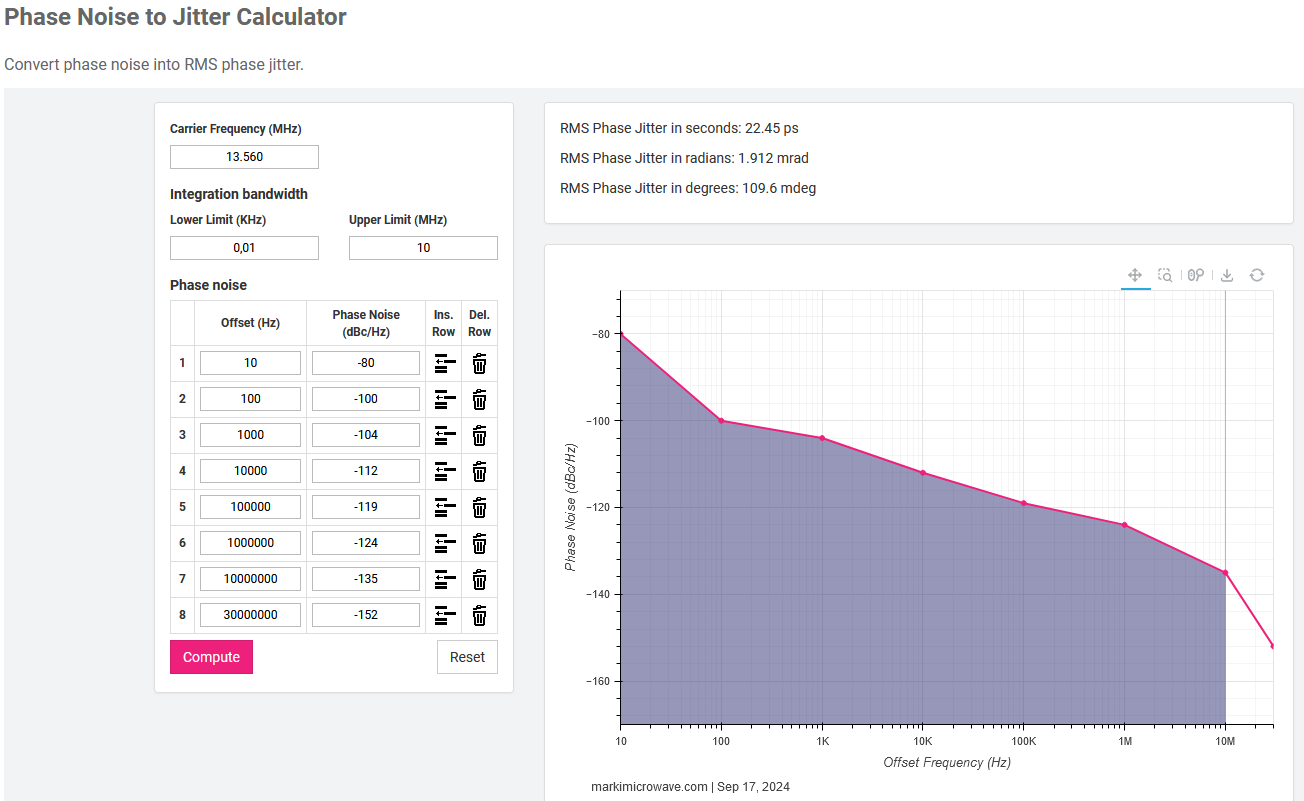</img></a>

rms_jitter: 22.446126239590715 ps


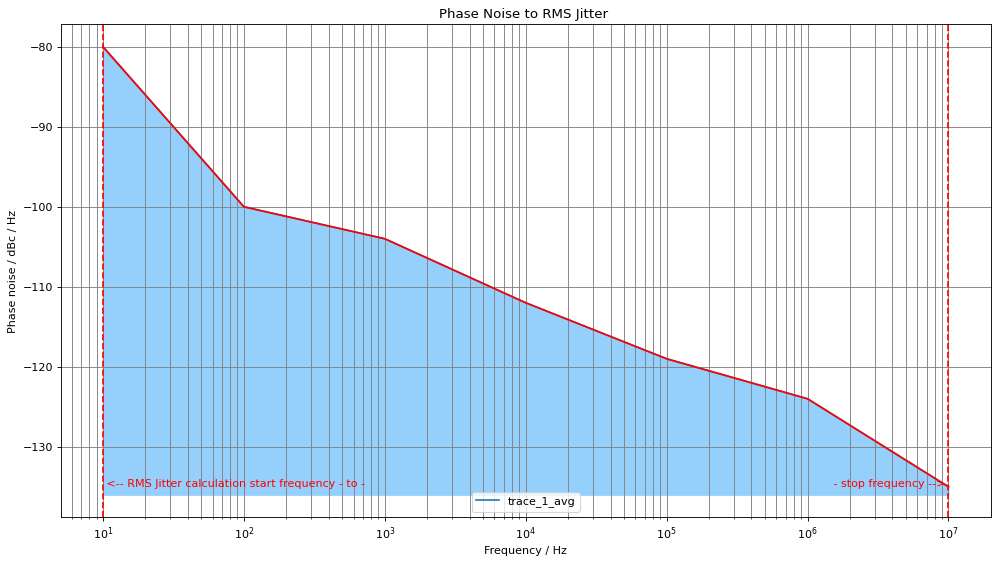

In [8]:
print(f"rms_jitter: {float(rms_jitter_ps)} ps")

plot_trace_with_fill(freq, L_f_dBc, 10, 10_000_000)

## Reale Messwerte einsetzen

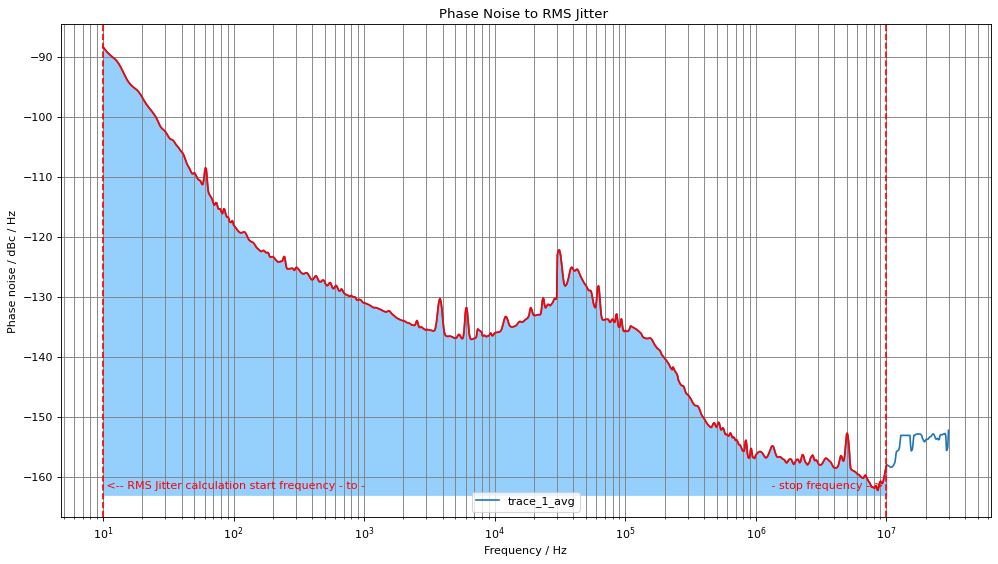

In [9]:
from pathlib import Path

path = r"input"
trace_file = r"RigolDG4162_13560kHz_10dBm_(0)_trace_1_avg.csv"  # -> with error
# trace_file = r"SMB100B_13560kHz_5dBm_(0)_trace_1_avg.csv"  # -> without error

filepath = Path(path, trace_file).resolve()
df = pd.read_csv(filepath, sep = ";")
freq = list(df["X_Freq_Hz"])
L_f_dBc  = list(df["Y_Ampl_dBc_Hz"])

start_freq_Hz = 10
stop_freq_Hz = 10_000_000

# using helper function to limit the range to be calculated
id1 = search_index(freq, start_freq_Hz)
id2 = search_index(freq, stop_freq_Hz)

plot_trace_with_fill(freq, L_f_dBc, start_freq_Hz, stop_freq_Hz)

In [10]:
# diskretes_integral(freq = freq[id1:id2], L_f_dBc = L_f_dBc[id1:id2], f_c = f_c)

In [11]:
rms_jitter_ps, a, b = calc_rms_jitter_from_phasenoise(freq = freq[id1:id2], L_f_dBc = L_f_dBc[id1:id2], f_c = f_c, debug = False, break_at_limits = False)
print(f"rms jitter = {rms_jitter_ps} ps")

rms jitter = nan ps


/tmp/ipykernel_18767/2795142771.py:19: RuntimeWarning: overflow encountered in scalar power
  s_2 = freq[i+1]**(c+1) - freq[i]**(c+1)
/tmp/ipykernel_18767/2795142771.py:19: RuntimeWarning: invalid value encountered in scalar subtract
  s_2 = freq[i+1]**(c+1) - freq[i]**(c+1)


# Eingrenzen des Fehlers

- using variable break_at_limits to break at the first unexpected value
- Erweiterung der Funktion. Abbruch, wenn ein unerwartetes ergebnis eintritt. Fläche == 0.

In [12]:
rms_jitter_ps, a, b = calc_rms_jitter_from_phasenoise(freq = freq[id1:id2], L_f_dBc = L_f_dBc[id1:id2], f_c = f_c, debug = False, break_at_limits = True)
rms_jitter_ps

695; a[695]: 1391.767108508132	; b[695]: -130.044266	  c: 139.1767108508132	freq_i: 29853.820313	s_1: 0.0	s_2: nan


/tmp/ipykernel_17685/2795142771.py:19: RuntimeWarning: overflow encountered in scalar power
  s_2 = freq[i+1]**(c+1) - freq[i]**(c+1)
/tmp/ipykernel_17685/2795142771.py:19: RuntimeWarning: invalid value encountered in scalar subtract
  s_2 = freq[i+1]**(c+1) - freq[i]**(c+1)


ValueError: s_1 or s_2 is 0.0 or NaN

## Gleichung und Werte des Elemets $s_2$ untersuchen
$$ s_2 = f_i^{-c} = \frac{1}{f_i^{c}} $$

Werte aus der letzten Ausführung / Fehlerortung
$$freq_i = f_i = 29853.820313$$
$$c = 139.1767108508132$$


$$ s_2 = 29853.820313^{-139.1767108508132} = \frac{1}{29853.820313^{ 139.1767108508132}} $$


Zusächst Betrachtung als Integer.

$$ s_2 = 29853^{-139} = \frac{1}{29853^{139}} $$

### Untersuchung der Zwischenergebnisse mit Integer

In [13]:
freq_i = 29853
c = 139

$$ s_2 = f_i^{-c}  $$

In [14]:
s_2 = freq_i**(-c)
print(s_2)

0.0


  - $s_2$ ist Null, aber es sollte eine sehr kleine Zahl sein

$$ s_2 = f_i^{-c}  \Rightarrow  s_2 = \frac{1}{f_i^{c}} $$

In [15]:
s_2 = 1/freq_i**(c)
print(s_2)

0.0


$$ value = f_i^{c} $$

In [16]:
value = freq_i**(c)
print(value)

10551868086657404248544082762817153259110717101163624661655187479522045110502461712032171704678070920291314981250169630665055268631469072432631753594497355928095606481300489498036496245513087626221480506217588156438902950559267163828047615160850043804116111334305805829680072035954788003098808308047168292736533633740656316107715328356801357839737107004305113808648891572964688495969202658864855762784550616504255483418309824327168792102095389934330233591272827703749624423291620209093480678042829302129199852459938596467373462724742460255260522543613091050590154269269594494799930080646175547792159940111393657201620742117


In [17]:
s_2 = pow(freq_i,c)
s_2

10551868086657404248544082762817153259110717101163624661655187479522045110502461712032171704678070920291314981250169630665055268631469072432631753594497355928095606481300489498036496245513087626221480506217588156438902950559267163828047615160850043804116111334305805829680072035954788003098808308047168292736533633740656316107715328356801357839737107004305113808648891572964688495969202658864855762784550616504255483418309824327168792102095389934330233591272827703749624423291620209093480678042829302129199852459938596467373462724742460255260522543613091050590154269269594494799930080646175547792159940111393657201620742117

### Erneute Prüfung mit Float-Werten

In [18]:
freq_i = 29853.820313
c = 139.1767108508132

$$ s_2 = f_i^{-c}  $$

In [19]:
s_2 = freq_i**(-c)
print(s_2)

0.0


  - Und wieder. $s_2$ ist Null, aber es sollte eine sehr kleine Zahl sein

In [20]:
s_2?

Type:        float
String form: 0.0
Docstring:   Convert a string or number to a floating point number, if possible.

Umstellen der Formel, vieleicht hat man mehr Glück

$$ s_2 = f_i^{-c}  \Rightarrow  s_2 = \frac{1}{f_i^{c}} $$

In [21]:
s_2 = 1/freq_i**(c)
print(s_2)

OverflowError: (34, 'Numerical result out of range')

Wenn die Formel umgestellt wird, erhalten wir einen Fehler anstelle von Null.

$$ value = f_i^{c} $$

In [22]:
value = freq_i**(c)
print(value)

OverflowError: (34, 'Numerical result out of range')

In [23]:
value = pow(freq_i, (c))
print(value)

OverflowError: (34, 'Numerical result out of range')

# Wo liegen die Fließkommagrenzen in Python

In [24]:
import sys

print(f"Größte darstellbare Fließkommazahl: {sys.float_info.max}")
print(f"Kleinste darstellbare positive Fließkommazahl: {sys.float_info.min}")
print(f"Abstand zwischen 1 und der nächstgelegenen darstellbaren Fließkommazahl: {sys.float_info.epsilon}")

Größte darstellbare Fließkommazahl: 1.7976931348623157e+308
Kleinste darstellbare positive Fließkommazahl: 2.2250738585072014e-308
Abstand zwischen 1 und der nächstgelegenen darstellbaren Fließkommazahl: 2.220446049250313e-16


Doppelt geprüft mit unserem Taschenrechner.

$$ {with}\hspace{1em} c = 139.1767108508132\hspace{1em} and\hspace{1em} f_i = 29853.820313 \hspace{1em} \Rightarrow  \hspace{1em} s_2 = \frac{1}{f_i^{c}} = 1.528378218..\cdot 10^{-623}  $$
$$ 1.528378218..\cdot 10^{-623}  \ll 2.2250738585072014e-308 $$

Hier findst du weitere Details zu den Fließkommagrenzen und Problemen
- https://docs.python.org/3/tutorial/floatingpoint.html
- https://jvns.ca/blog/2023/01/13/examples-of-floating-point-problems/

Wir brauchen eine höhere Genauigkeit/Präzision.

Die Bibliothek decimal schafft hier Abhilfe.
- https://docs.python.org/3/library/decimal.html

``` python
from decimal import Decimal
```

# Handhabung von Float zu Dezimal ändern

In [25]:
from decimal import Decimal

In [26]:

freq_i = 29853.820313
c = 139.1767108508132


In [27]:
print(str(freq_i).replace(".", ","))
print(str(c).replace(".", ","))
# 1   ÷   ( 9885,52832   ^   200,65714918019927 ) = 2,3698026413695585769738634875228e-802

29853,820313
139,1767108508132


$$ s_2 = \frac{1}{f_i^{c}} $$

In [28]:
import time
s_2 = 1/Decimal(freq_i)**Decimal(c)
print(s_2)

1.528378218781226631847091761E-623


In [29]:
s_2?

Type:        Decimal
String form: 1.528378218781226631847091761E-623
File:        /usr/lib/python3.10/decimal.py
Docstring:  
Construct a new Decimal object. 'value' can be an integer, string, tuple,
or another Decimal object. If no value is given, return Decimal('0'). The
context does not affect the conversion and is only passed to determine if
the InvalidOperation trap is active.

### Zur Erinnerung geprüft mit unserem Taschenrechner.
- windows, MAC, linux


$1   ÷   ( 9885,52832   ^   {200,65714918019927} ) = 2,3698026413695585769738634875228e-802$


Your result  -> $s_2 = 2.369802641369601515389619695608959173869778617122999579149940894508929177691605875403511398943082566e-802$

# Gleichungen zur Berechnung des RMS Jitter aus dem Phasenrauschen

I $${\LARGE a_i = \left( L_{(f_{i+1})} - L_{(f_{i})}  \right) /  \left( \log{(f_{i+1})}  -\log{(f_{i})} \right) }$$

II $${\LARGE b_i = L_{(f_{i})} }$$

III $${\LARGE RMS_{jitter} = \frac{1}{2 \pi f_c} \sqrt{2 \sum_{i=1}^{K-1} 10^{\frac{-b_i}{10}} f_i^{\frac{-a_i}{10}} \left(\frac{a_i}{10}\right)^{-1} \left( f_{i+1}^{\frac{a_i}{10}+1} - f_{i}^{\frac{a_i}{10}+1}  \right)   }}$$

with $$c = \frac{a_i}{10} $$

$${\LARGE RMS_{jitter} = \frac{1}{2 \pi f_c} \sqrt{2 \sum_{i=1}^{K-1} 10^{\frac{-b_i}{10}} f_i^{-c} \left(c\right)^{-1} \left( f_{i+1}^{c+1} - f_{i}^{c+1}  \right)   }}$$
substitude with

$$ s_1 = 10^{\frac{-b_i}{10}} $$
$$ s_2 = f_i^{-c} $$
$$ s_3 = \left(c\right)^{-1}  $$

$$ s_4 = s_2 \cdot s_3 = f_i^{-c} \cdot \left(c\right)^{-1} = \frac{f_i^{-c}}{c} $$

$$ s_5 = \left( f_{i+1}^{c+1} - f_{i}^{c+1}  \right) $$



$${\LARGE RMS_{jitter} = \frac{1}{2 \pi f_c} \sqrt{2 \sum_{i=1}^{K-1}\left( s_1 \cdot s_4 \cdot   s_5 \right) }}$$

# Überarbeitung der Funktion zur Verwendung von Decimal

In [30]:
from decimal import Decimal
# # # # #  # # Berechnung OK
def calc_rms_jitter_from_phasenoise(freq, L_f_dBc, f_c, debug = False, break_at_limits = False):
    """Calculate the root mean square (RMS) jitter from phase noise using the given parameters.

    Args:
        freq (list): A list of frequencies.
        L_f_dBc (list): A list of phase noise values.
        f_c (float): The carrier frequency.
        debug (bool, optional): If True, print debug information. Defaults to False.
    
    Returns:
        float: The RMS jitter in picoseconds.
    
    Raises:
        None.
    
    """
    a=[]
    b=[]
    sum_elements = []

    if not len(freq) == len(L_f_dBc):
        raise ValueError(f"len(freq): {len(freq)} not equal to len(L_f_dBc): {len(L_f_dBc)} -> Calulation will failed!")
    
    if float(f_c) == 0.0:
        raise ValueError(f"f_c == 0 -> Calulation will failed!")
        
    if f_c == None:
        raise ValueError(f"f_c == None -> Calulation will failed!")
         
    for i in range(len(freq)-1):
        # print(i)
        a.append((L_f_dBc[i+1]-L_f_dBc[i])/(np.log10(freq[i+1])-np.log10(freq[i])))
        if debug: print(f"a{i}: {a[i]}")
    print("---")
    for i in range(len(freq)):
        b.append(L_f_dBc[i])
        if debug: print(f"b{i}: {b[i]}")
    # print(f"len f: {len(freq)}, L_f_dBc {len(L_f_dBc)}")
    for i in range(len(freq)-1):
        c = Decimal(a[i]/10.0)
        # if debug: print(f"{i} c {c}")
        s_1 = Decimal(10**(Decimal(b[i])/10))
        s_2 = pow(Decimal(freq[i]), Decimal(-c))
        s_3 = Decimal((c)+1)
        # s_4 = freq[i]**(-c) * ((c)+1)**-1
        s_4 = s_2 / s_3
        s_5 = pow(Decimal(freq[i+1]),Decimal(c+1)) - pow(Decimal(freq[i]), Decimal(c+1))
        
        # if debug: print(f"c: {c}\t subst1: {s_4}\tsubst2: {s_5}")
        if debug: print(f"{i}; freq_i {freq[i]}; e1: {c}; s_1: {float(s_1)}; s_2: {float(s_2)}; s_3: {float(s_3)}; s_4: {float(s_4)}; s_5: {float(s_5)}")

        if break_at_limits:
            if s_4 == 0.0 or np.isnan(float(s_4)) or s_5 == 0.0 or np.isnan(float(s_5))or s_1 == 0.0 or np.isnan(float(s_1))or s_2 == 0.0 or np.isnan(float(s_2))or s_3 == 0.0 or np.isnan(float(s_3)):
                print(f"{i}; e1 {c}\tfreq_i: {freq[i]}\ts_4: {s_4}\ts_5: {s_5}")
                raise ValueError("s_4 or s_5 is 0.0 or NaN")
                
        sum_elements.append(s_1 * s_4 * s_5)
        # sum_elements.append(Decimal(10**b[i]/10) * s_4 * s_5) # -> Error
        # sum_elements.append(Decimal(10**(Decimal(b[i])/10)) * s_4 * s_5)
        # sum_elements.append(Decimal(10**(Decimal(b[i])/10)) * (s_4) * (s_5)) # -> Corrected
        # sum_elements.append(pow(Decimal(10), (Decimal(b[i])/10)) * (s_4) * (s_5)) # -> Corrected
        
    if debug: print(sum_elements)
    if debug: print(f"sum {np.sum(sum_elements)}")
    if debug: print(2*np.sum(sum_elements))
    if debug: print((2*np.pi*f_c))
    rms_jitter = np.sqrt(2*np.sum(sum_elements)) / Decimal((2*np.pi*f_c))
    
    rms_jitter_ps = float(rms_jitter)/1e-12
    if debug: print(float(rms_jitter_ps))
    return float(rms_jitter_ps)

In [31]:
f_c = 13560000
start_freq_Hz = 10
stop_freq_Hz = 10_000_000

id1 = search_index(freq, start_freq_Hz)
id2 = search_index(freq, stop_freq_Hz)

rms_jitter_ps = calc_rms_jitter_from_phasenoise(freq = freq[id1:id2], L_f_dBc = L_f_dBc[id1:id2], f_c = f_c, debug = False, break_at_limits=True)


---


rms_jitter 2.463491398373181 ps


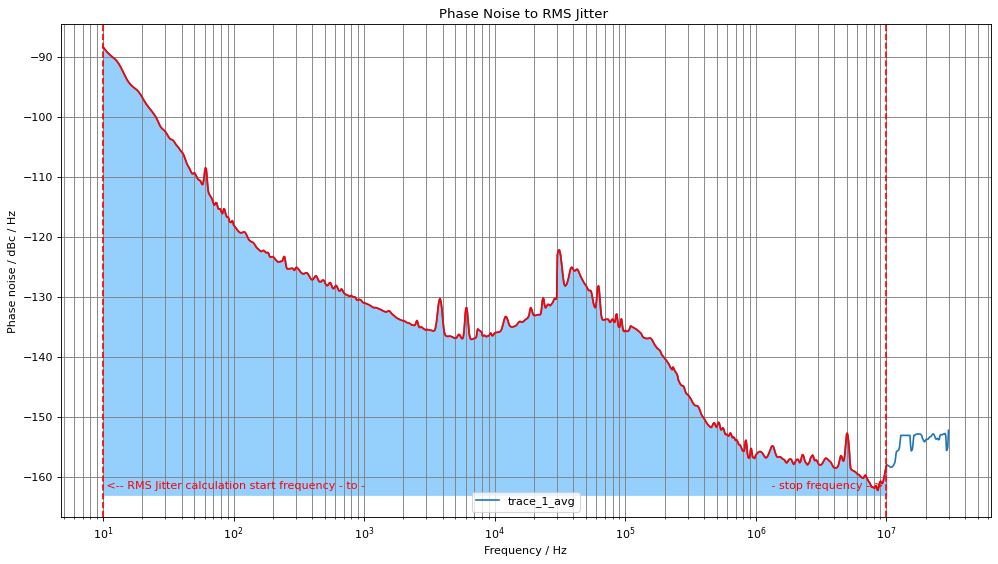

In [32]:
print(f"rms_jitter {rms_jitter_ps} ps")
plot_trace_with_fill(freq, L_f_dBc, start_freq_Hz, stop_freq_Hz)

$$\LARGE The\hspace{0.2em}End$$



$$\LARGE To\hspace{0.2em}be \hspace{0.2em} continued \hspace{0.2em} ...$$

In [33]:
1/(4700**200)

0.0

In [34]:
from decimal import Decimal
1/pow(Decimal(4700.0), Decimal(200))

Decimal('3.805646218750940372126349645E-735')

In [35]:
import sys

print(f"Größte darstellbare Fließkommazahl: {sys.float_info.max}")
print(f"Kleinste darstellbare positive Fließkommazahl: {sys.float_info.min}")
print(f"Abstand zwischen 1 und der nächstgelegenen darstellbaren Fließkommazahl: {sys.float_info.epsilon}")
print("---")

Größte darstellbare Fließkommazahl: 1.7976931348623157e+308
Kleinste darstellbare positive Fließkommazahl: 2.2250738585072014e-308
Abstand zwischen 1 und der nächstgelegenen darstellbaren Fließkommazahl: 2.220446049250313e-16
---


# Rechengeschwindigkeit prüfen

$$ value = \frac{1}{b^{m}} $$
$$ s_2 = f_i^{-c} $$

In [36]:
import timeit

In [37]:
def calc_s_2_float(b, m):
    if b**m == 0:
        raise ValueError("Division by 0")
    return 1/(b**m)

def calc_s_2_decimal(b, m):
    return 1/Decimal(b)**Decimal(m)

# Inside & outside limits

In [38]:
print("---")
print("Innerhalb der Floating point Grenzen")
b = 500
m = 112
print(f"b = {b}; m = {m}; value => 5.1922968585348276e-303 within limit")

value = calc_s_2_float(b, m)
print(f"float   calc value: {value}; type: {type(value)}")

%timeit value = calc_s_2_float(b, m)
print(f"float   calc value: {value}; type: {type(value)}")

%timeit value = calc_s_2_decimal(b, m)
print(f"decimal calc value: {value}; type: {type(value)}")

print("---")
print("Außerhalb der Floating point Grenzen")
b = 500
m = 200

print(f"b = {b}; m = {m}")
value = calc_s_2_float(b, m)
print(f"float   calc value: {value}; type: {type(value)}")

value = calc_s_2_decimal(b, m)
print(f"decimal calc value: {value}; type: {type(value)}")

print("---")
print("Wiederverwendung von Variablen schlägt bei Überlauf fehl, das Ergebnis wird bei Verwendung von %timeit nicht überschrieben")
b = 500
m = 201
print(f"b = {b}; m = {m}")
%timeit value = calc_s_2_float(b, m)
print(f"float   calc value: {value}; type: {type(value)}")



---
Innerhalb der Floating point Grenzen
b = 500; m = 112; value => 5.1922968585348276e-303 within limit
float   calc value: 5.1922968585348276e-303; type: <class 'float'>
1.04 µs ± 48 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
float   calc value: 5.1922968585348276e-303; type: <class 'float'>
558 ns ± 25.5 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
decimal calc value: 5.1922968585348276e-303; type: <class 'float'>
---
Außerhalb der Floating point Grenzen
b = 500; m = 200
float   calc value: 0.0; type: <class 'float'>
decimal calc value: 1.606938044258990275541962092E-540; type: <class 'decimal.Decimal'>
---
Wiederverwendung von Variablen schlägt bei Überlauf fehl, das Ergebnis wird bei Verwendung von %timeit nicht überschrieben
b = 500; m = 201
1.27 µs ± 18.9 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
float   calc value: 1.606938044258990275541962092E-540; type: <class 'decimal.Decimal'>


In [39]:
value?

Type:        Decimal
String form: 1.606938044258990275541962092E-540
File:        /usr/lib/python3.10/decimal.py
Docstring:  
Construct a new Decimal object. 'value' can be an integer, string, tuple,
or another Decimal object. If no value is given, return Decimal('0'). The
context does not affect the conversion and is only passed to determine if
the InvalidOperation trap is active.

In [40]:

print("---")
print("ohne Verwendung von %timeit wird die Variable erneut zugewiesen")
b = 500
m = 201
print(f"b = {b}; m = {m}")
value = calc_s_2_float(b, m)
print(f"float   calc value: {value}; type: {type(value)}")
value?

---
ohne Verwendung von %timeit wird die Variable erneut zugewiesen
b = 500; m = 201
float   calc value: 0.0; type: <class 'float'>


Type:        float
String form: 0.0
Docstring:   Convert a string or number to a floating point number, if possible.

In [41]:
print("Innerhalb der Floating point Grenzen")
b = 500
m = 112
print(f"b = {b}; m = {m}; value => 5.1922968585348276e-303 within limit")

value = calc_s_2_float(b, m)
value?

Innerhalb der Floating point Grenzen
b = 500; m = 112; value => 5.1922968585348276e-303 within limit


Type:        float
String form: 5.1922968585348276e-303
Docstring:   Convert a string or number to a floating point number, if possible.

## Value löschen um den Vorgang zu verdeutlichen

In [42]:
del(value)
value?

Object `value` not found.


In [43]:
print("---")
print("Wert wird der Variablen nicht zugewiesen.")
b = 500
m = 201
print(f"b = {b}; m = {m}")
%timeit value = calc_s_2_float(b, m)
print(f"float   calc value: {value}; type: {type(value)}")

---
Wert wird der Variablen nicht zugewiesen.
b = 500; m = 201
1.25 µs ± 20.7 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


NameError: name 'value' is not defined

In [44]:
list() == []

True

In [45]:
mydict = {"A": 2}
mydicta = mydict
mydicta["b"] = 7
mydict

{'A': 2, 'b': 7}

In [46]:
mydict = {"A": 2}
mydicta = mydict.copy()
mydicta["b"] = 7
mydict

{'A': 2}

In [47]:
mydicta

{'A': 2, 'b': 7}